In [2]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import os

### Data Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [14]:

# reading the dataset

df = pd.read_csv('data/auto-mpg.data', header=None, delimiter="\s+")

# df[[0, 'car_name']] = df[0].str.split('\t', expand=True)

df.head()


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [15]:

# defining column names
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df.columns = columns
# df['car_name'] = df['car_name'].apply(lambda x: x.replace('"', ''))

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [18]:
# converting columns to float type
for col in df.columns:
    if col not in ['mpg', 'car_name']:
        df = df[pd.to_numeric(df[col], errors='coerce').notnull()]
        df[col] = df[col].astype(float)

# seperating dependant and independant variables
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = df['mpg']

In [19]:
# train test split
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0)

In [20]:
# function to evaluate model performance
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    return rmse, mae

## The conventional way

In [21]:
alpha, l1_ratio = 0.01, 0.15
    
# initiating an elastic net model
lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# fitting the model with train dataset
lr.fit(train_X, train_y)

# making predictions on test set
y_pred = lr.predict(test_X)

# obtaining the model performance
rmse, mae = eval_metrics(test_y, y_pred)

print('Hyperparameters: Alpha =  {}, L1 Ratio = {} \n'.format(alpha, l1_ratio))

print('Model Performance on test set: RMSE = {}, MAE = {} \n'.format(rmse, mae))

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.15 

Model Performance on test set: RMSE = 3.2640850592427535, MAE = 2.442825267353496 



In [22]:
alphas, l1_ratios = [0.01, 0.02, 0.5], [0.15, 0.2, 0.5]
    
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # initiating an elastic net model
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

        # fitting the model with train dataset
        lr.fit(train_X, train_y)

        # making predictions on test set
        y_pred = lr.predict(test_X)

        # obtaining the model performance
        rmse, mae = eval_metrics(test_y, y_pred)

        print('Hyperparameters: Alpha =  {}, L1 Ratio = {} \n'.format(alpha, l1_ratio))

        print('Model Performance on test set: RMSE = {}, MAE = {} \n'.format(rmse, mae))
        
        print ('-'*50,'\n')

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.15 

Model Performance on test set: RMSE = 3.2640850592427535, MAE = 2.442825267353496 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.2 

Model Performance on test set: RMSE = 3.2641081943690287, MAE = 2.442779799335202 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.5 

Model Performance on test set: RMSE = 3.264253936304378, MAE = 2.442505372857683 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.02, L1 Ratio = 0.15 

Model Performance on test set: RMSE = 3.2682306618265717, MAE = 2.4462236246381988 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.02, L1 Ratio = 0.2 

Model Performance on test set: RMSE = 3.268290119727705, MAE = 2.446143110178125 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.02, L1 Ratio = 0.5 

Model Performance on

## Using mlflow

In [26]:
# AMC Note: for some reason it always looks for standard port 5000,
# but it will not raise an error if server is not reached, just it
# will not save the run, apparently the custom port should be re-declared 
# on each notebook prior to running mlflow command as the next line indicates:
mlflow.set_tracking_uri("http://localhost:8968")
# defining a new experiment
experiment_name = 'PlainRegression'
# returns experiment ID
try:
    # creating a new experiment
    exp_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

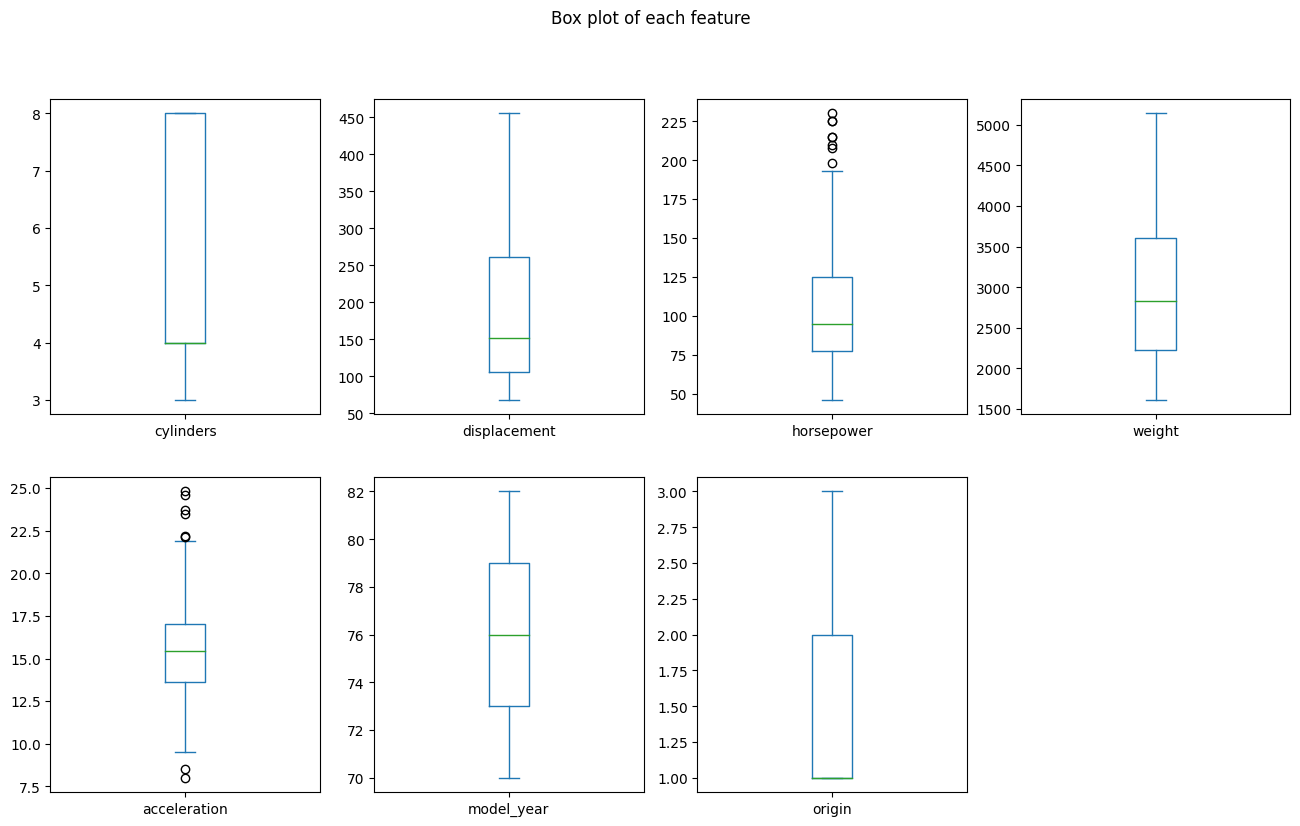

In [31]:
if 'images' not in os.listdir():
    os.mkdir('images')

with mlflow.start_run(experiment_id=exp_id, run_name='Run 1'):
    
    # simulating EDA process by creating distribution plots for all the features
    train_X.plot(kind='box', subplots=True, layout=(2,4), figsize=(16,9), title='Box plot of each feature')
    
    # saving the image to images folder
    plt.savefig('images/distribution_plot_all_features.png')

    # logging artifacts -> saves the image and enables tracking for later use
    mlflow.log_artifacts('images')
    
    # defining alpha and l1 ratio
    alpha, l1_ratio = 0.02, 0.15
    
    # initiating an elastic net model
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

    # fitting the model with train dataset
    lr.fit(train_X, train_y)

    # making predictions on test set
    y_pred = lr.predict(test_X)

    # obtaining the model performance
    rmse, mae = eval_metrics(test_y, y_pred)
    
    # logging the parameters 
    mlflow.log_param('alpha', alpha)
    mlflow.log_param('l1_ratio', l1_ratio)
        
    # logging the metrics
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('mae', mae)
    # can be passed as dictionary to mlflow.log_metrics({'rmse': rmse, 'mae': mae})
    
    # saving the model for later use
    mlflow.sklearn.log_model(lr, "PlainRegression_Model")
    

## Hyperparameter Tuning using mlflow

In [ ]:
# defining a new experiment
experiment_name = 'PlainRegression_HyperParameter_Search'
# returns experiment ID
try:
    # creating a new experiment
    exp_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [ ]:
# defining alpha and l1 ratio
alphas, l1_ratios = [0.01, 0.05, 0.1, 0.02, 0.03], [0.15, 0.1, 0.2, 0.25]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        # starting an mlflow run, and tracking them under the experiment defined above
        with mlflow.start_run(experiment_id=exp_id):

            # logging artifacts -> saves the image and enables tracking for later use
            mlflow.log_artifacts('images')

            # initiating an elastic net model
            lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

            # fitting the model with train dataset
            lr.fit(train_X, train_y)

            # making predictions on test set
            y_pred = lr.predict(test_X)

            # obtaining the model performance
            rmse, mae = eval_metrics(test_y, y_pred)

            # logging hyperparameters defined above
            mlflow.log_param("alpha", alpha)
            mlflow.log_param("l1_ratio", l1_ratio)

            # logging performance of the model
            mlflow.log_metric("rmse", rmse)
            mlflow.log_metric("mae", mae)
    